In [288]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


In [299]:
collisions = pd.read_csv('/Users/bennguyen/Downloads/nypd_mv_collisions.csv')  
collisions

,Unnamed: 0,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,0,NaN,Unspecified,NaN,NaN,NaN,NaN,50 AVENUE,2014-01-10 14:01:00,NaN,...,0,NaN,11 STREET,244818,SMALL COM VEH(4 TIRES),NaN,NaN,NaN,NaN,NaN
1,1,NaN,Unspecified,NaN,NaN,NaN,NaN,NaN,2022-01-07 06:05:00,NaN,...,0,NaN,BROOKLYN BRIDGE,4492773,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN
2,2,NaN,Unsafe Speed,Unspecified,NaN,NaN,NaN,NaN,2021-08-19 22:00:00,NaN,...,0,NaN,BROOKLYN BRIDGE,4449227,Sedan,Sedan,NaN,NaN,NaN,NaN
3,3,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,NORTH CONDUIT AVENUE,2021-11-25 11:48:00,NaN,...,0,NaN,77 STREET,4481726,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,NaN
4,4,NaN,Outside Car Distraction,Unspecified,NaN,NaN,NaN,NaN,2013-06-11 10:40:00,NaN,...,0,NaN,NaN,2889035,OTHER,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070589,2070589,QUEENS,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,BEACH 105 STREET,2012-08-15 15:30:00,40.581184,...,0,NaN,SHORE FRONT PARKWAY,201123,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,11694.0
2070590,2070590,QUEENS,Pavement Slippery,Pavement Slippery,NaN,NaN,NaN,BEACH 116 STREET,2019-06-10 14:00:00,40.581764,...,0,NaN,BEACH CHANNEL DRIVE,4148928,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11694.0
2070591,2070591,QUEENS,Backing Unsafely,Following Too Closely,NaN,NaN,NaN,BEACH CHANNEL DRIVE,2016-08-01 08:15:00,40.583920,...,0,NaN,BEACH 108 STREET,3492996,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11694.0
2070592,2070592,QUEENS,Unspecified,Unspecified,NaN,NaN,NaN,BEACH CHANNEL DRIVE,2015-09-13 13:36:00,40.583932,...,0,NaN,BEACH 108 STREET,3295860,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,11694.0


In [152]:
# get unique columns
collisions.columns.unique()

Index(['Unnamed: 0', 'borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'cross_street_name', 'timestamp', 'latitude', 'longitude', 'location',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_persons_injured', 'number_of_persons_killed',
       'off_street_name', 'on_street_name', 'unique_key', 'vehicle_type_code1',
       'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5', 'zip_code'],
      dtype='object')

In [153]:
# only get brooklyn data
brooklyn = collisions.loc[collisions['borough'] == 'BROOKLYN']
brooklyn

,Unnamed: 0,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
31912,31912,BROOKLYN,Fell Asleep,Unspecified,NaN,NaN,NaN,FULTON STREET,2016-04-29 02:20:00,NaN,...,0,NaN,FLATBUSH AVENUE EXTENSION,3436326,Dump,Van,NaN,NaN,NaN,11201.0
31913,31913,BROOKLYN,Backing Unsafely,Unspecified,NaN,NaN,NaN,NaN,2016-09-07 15:45:00,NaN,...,0,130 SAINT EDWARDS STREET,NaN,3516204,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11201.0
31914,31914,BROOKLYN,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,BROOKLYN BRIDGE,2018-03-26 19:57:00,NaN,...,0,NaN,BROOKLYN QNS EXPRESSWAY,3871602,Taxi,Sedan,NaN,NaN,NaN,11201.0
31915,31915,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,FULTON STREET,2016-09-28 08:35:00,NaN,...,0,NaN,FLATBUSH AVENUE,3528792,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11201.0
31916,31916,BROOKLYN,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,BALTIC STREET,2023-09-05 23:27:00,40.683956,...,0,NaN,HOYT STREET,4659966,scooter,E-Scooter,NaN,NaN,NaN,11201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068383,2068383,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,NaN,2020-03-14 16:00:00,40.718338,...,0,114 NORTH 6 STREET,NaN,4300866,Taxi,Sedan,NaN,NaN,NaN,11249.0
2068384,2068384,BROOKLYN,Passing Too Closely,Unspecified,NaN,NaN,NaN,NaN,2018-09-15 19:00:00,40.719364,...,0,139 NORTH 9 STREET,NaN,3981469,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11249.0
2068385,2068385,BROOKLYN,Fell Asleep,Unspecified,NaN,NaN,NaN,NORTH 10 STREET,2013-10-05 19:56:00,40.721978,...,0,NaN,KENT AVENUE,200324,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,11249.0
2068386,2068386,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,KENT AVENUE,2015-05-08 07:40:00,40.721978,...,0,NaN,NORTH 10 STREET,3216862,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,11249.0


In [120]:
#keep only relevant data
brooklyn = brooklyn.drop(['latitude', 'longitude', 'location','off_street_name','unique_key', 'vehicle_type_code1','vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4','vehicle_type_code_5'],axis=1)
brooklyn

,Unnamed: 0,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,on_street_name,zip_code
31912,31912,BROOKLYN,Fell Asleep,Unspecified,NaN,NaN,NaN,FULTON STREET,2016-04-29 02:20:00,0,0,0,0,0,0,0,0,FLATBUSH AVENUE EXTENSION,11201.0
31913,31913,BROOKLYN,Backing Unsafely,Unspecified,NaN,NaN,NaN,NaN,2016-09-07 15:45:00,0,0,0,0,0,0,0,0,NaN,11201.0
31914,31914,BROOKLYN,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,BROOKLYN BRIDGE,2018-03-26 19:57:00,0,0,0,0,0,0,0,0,BROOKLYN QNS EXPRESSWAY,11201.0
31915,31915,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,FULTON STREET,2016-09-28 08:35:00,0,0,0,0,0,0,0,0,FLATBUSH AVENUE,11201.0
31916,31916,BROOKLYN,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,BALTIC STREET,2023-09-05 23:27:00,0,0,1,0,0,0,2,0,HOYT STREET,11201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068383,2068383,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,NaN,2020-03-14 16:00:00,0,0,0,0,0,0,0,0,NaN,11249.0
2068384,2068384,BROOKLYN,Passing Too Closely,Unspecified,NaN,NaN,NaN,NaN,2018-09-15 19:00:00,0,0,0,0,0,0,0,0,NaN,11249.0
2068385,2068385,BROOKLYN,Fell Asleep,Unspecified,NaN,NaN,NaN,NORTH 10 STREET,2013-10-05 19:56:00,0,0,0,0,0,0,0,0,KENT AVENUE,11249.0
2068386,2068386,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,KENT AVENUE,2015-05-08 07:40:00,0,0,0,0,0,0,0,0,NORTH 10 STREET,11249.0


In [154]:
# set datetime object to coloumn
brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'])
brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
brooklyn['Year'] = brooklyn['timestamp'].dt.year

/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/2541035640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'])
/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/2541035640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/2541035640.py:3: SettingWithCopyWarning: 
A value is 

In [155]:
#get time of day, create time of day column
brooklyn['hour'] = brooklyn['timestamp'].dt.hour

# Define time_of_day function
def get_time_of_day(hour):
    if 5 <= hour <= 6:
        return "sunrise (5 am - 7 am)"
    elif 7 <= hour <= 10:
        return "morning (7-10 am)"
    elif 11 <= hour <= 14:
        return "lunch rush (11 am - 2 pm)"
    elif 15 <= hour <= 18:
        return "afternoon rush hour (3 - 6 pm)"
    elif 19 <= hour <= 22:
        return "evening (7 - 10 pm)"
    else:
        # Covers hours 23, 0, 1, 2, 3, 4
        return "night (11 - 4 am)"

# Apply function
brooklyn['time_of_day'] = brooklyn['hour'].apply(get_time_of_day)

/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/376844836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['hour'] = brooklyn['timestamp'].dt.hour
/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/376844836.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['time_of_day'] = brooklyn['hour'].apply(get_time_of_day)


In [156]:
brooklyn

,Unnamed: 0,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,...,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,Year,hour,time_of_day
31912,31912,BROOKLYN,Fell Asleep,Unspecified,NaN,NaN,NaN,FULTON STREET,2016-04-29 02:20:00,NaN,...,3436326,Dump,Van,NaN,NaN,NaN,11201.0,2016,2,night (11 - 4 am)
31913,31913,BROOKLYN,Backing Unsafely,Unspecified,NaN,NaN,NaN,NaN,2016-09-07 15:45:00,NaN,...,3516204,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11201.0,2016,15,afternoon rush hour (3 - 6 pm)
31914,31914,BROOKLYN,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,BROOKLYN BRIDGE,2018-03-26 19:57:00,NaN,...,3871602,Taxi,Sedan,NaN,NaN,NaN,11201.0,2018,19,evening (7 - 10 pm)
31915,31915,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,FULTON STREET,2016-09-28 08:35:00,NaN,...,3528792,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11201.0,2016,8,morning (7-10 am)
31916,31916,BROOKLYN,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,BALTIC STREET,2023-09-05 23:27:00,40.683956,...,4659966,scooter,E-Scooter,NaN,NaN,NaN,11201.0,2023,23,night (11 - 4 am)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068383,2068383,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,NaN,2020-03-14 16:00:00,40.718338,...,4300866,Taxi,Sedan,NaN,NaN,NaN,11249.0,2020,16,afternoon rush hour (3 - 6 pm)
2068384,2068384,BROOKLYN,Passing Too Closely,Unspecified,NaN,NaN,NaN,NaN,2018-09-15 19:00:00,40.719364,...,3981469,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11249.0,2018,19,evening (7 - 10 pm)
2068385,2068385,BROOKLYN,Fell Asleep,Unspecified,NaN,NaN,NaN,NORTH 10 STREET,2013-10-05 19:56:00,40.721978,...,200324,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,11249.0,2013,19,evening (7 - 10 pm)
2068386,2068386,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,KENT AVENUE,2015-05-08 07:40:00,40.721978,...,3216862,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,11249.0,2015,7,morning (7-10 am)


In [157]:

# add year column
year_dif = brooklyn.copy()

# Remove blank or null zip codes
year_dif = year_dif[year_dif['zip_code'].notna() & (year_dif['zip_code'].astype(str).str.strip() != '')]

# Remove invalid years and exclude incomplete years 2012 & 2024
year_dif = year_dif[year_dif['Year'].notna() & (~year_dif['Year'].isin([2012, 2024]))]

# Ensure timestamp is datetime and extract year
year_dif['timestamp'] = pd.to_datetime(year_dif['timestamp'], errors='coerce')
year_dif['Year'] = year_dif['timestamp'].dt.year


In [158]:
# Remove rows with invalid year and drop 2024 (incomplete)
year_dif = year_dif[year_dif['Year'].notna() & (year_dif['Year'] != 2024)]

# Group by zip code and year, summing number_of_persons_injured
yearly_totals = year_dif.groupby(['zip_code', 'Year'], as_index=False) \
                        .agg({'number_of_persons_injured': 'sum'}) \
                        .rename(columns={'number_of_persons_injured': 'total_persons_injured'})

In [159]:
# Calculate percent change per zip code
yearly_totals['pct_change'] = yearly_totals.groupby('zip_code')['total_persons_injured'] \
                                           .pct_change() * 100

# Replace inf/-inf with NaN
yearly_totals['pct_change'] = yearly_totals['pct_change'].replace([np.inf, -np.inf], np.nan)

In [160]:
yearly_totals = yearly_totals.groupby('zip_code', group_keys=False) \
                             .apply(lambda g: g.sort_values('Year').iloc[1:])

/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/1995793691.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('Year').iloc[1:])


In [161]:
yearly_totals = yearly_totals.dropna(subset=['pct_change'])

In [162]:
# Calculate average percent change per zip code
avg_pct = yearly_totals.groupby('zip_code')['pct_change'].mean().reset_index()
avg_pct = avg_pct.rename(columns={'pct_change': 'avg_pct_change'})

# Merge back into yearly_totals
yearly_totals = yearly_totals.merge(avg_pct, on='zip_code', how='left')

In [163]:
# dataframe that shows pct change and avg pct change per zip code per year
yearly_totals

,zip_code,Year,total_persons_injured,pct_change,avg_pct_change
0,11201.0,2014,387,3.200000,-0.978419
1,11201.0,2015,351,-9.302326,-0.978419
2,11201.0,2016,357,1.709402,-0.978419
3,11201.0,2017,267,-25.210084,-0.978419
4,11201.0,2018,322,20.599251,-0.978419
...,...,...,...,...,...
385,11385.0,2019,6,200.000000,-10.833333
386,11385.0,2021,0,-100.000000,-10.833333
387,11385.0,2023,3,-62.500000,-10.833333
388,11421.0,2021,1,-50.000000,-25.000000


In [164]:
yearly_totals[yearly_totals['zip_code'] == 11201.0]

,zip_code,Year,total_persons_injured,pct_change,avg_pct_change
0,11201.0,2014,387,3.200000,-0.978419
1,11201.0,2015,351,-9.302326,-0.978419
2,11201.0,2016,357,1.709402,-0.978419
3,11201.0,2017,267,-25.210084,-0.978419
4,11201.0,2018,322,20.599251,-0.978419
5,11201.0,2019,358,11.180124,-0.978419
6,11201.0,2020,228,-36.312849,-0.978419
7,11201.0,2021,253,10.964912,-0.978419
8,11201.0,2022,254,0.395257,-0.978419
9,11201.0,2023,287,12.992126,-0.978419


In [165]:
#get total persons injured and avg percent change per zip code over all time
total_incidents = yearly_totals.groupby('zip_code')['total_persons_injured'].sum().reset_index()
total_average = yearly_totals.groupby('zip_code')['pct_change'].mean().reset_index()
totals = total_incidents.merge(total_average, on='zip_code', how='left')
totals = totals.sort_values(by='total_persons_injured', ascending=False)
totals.rename(columns={'pct_change': 'avg_pct_change'}, inplace=True)
totals

,zip_code,total_persons_injured,avg_pct_change
5,11207.0,9222,-0.195282
33,11236.0,7060,0.783577
1,11203.0,6733,-2.436368
10,11212.0,6202,-0.049665
24,11226.0,5647,0.732569
6,11208.0,5620,1.737106
31,11234.0,5219,4.968346
30,11233.0,4669,-1.854184
4,11206.0,3902,-1.409134
8,11210.0,3887,-1.304407


In [166]:
# get top 8 zip codes with persons injured
totals_top8 = totals[totals['total_persons_injured'] > 5000]
totals_top8

,zip_code,total_persons_injured,avg_pct_change
5,11207.0,9222,-0.195282
33,11236.0,7060,0.783577
1,11203.0,6733,-2.436368
10,11212.0,6202,-0.049665
24,11226.0,5647,0.732569
6,11208.0,5620,1.737106
31,11234.0,5219,4.968346


In [167]:
# show largest average negative percentage changes per zip code
negative_pct = totals[totals['avg_pct_change'] < 0].sort_values(by='avg_pct_change', ascending=True)
negative_pct

,zip_code,total_persons_injured,avg_pct_change
40,11421.0,2,-25.000000
39,11385.0,16,-10.833333
11,11213.0,3539,-8.412893
14,11216.0,2710,-8.409937
19,11221.0,3306,-6.160166
35,11238.0,2553,-5.330033
3,11205.0,1923,-4.989874
23,11225.0,2405,-2.539043
1,11203.0,6733,-2.436368
22,11224.0,1294,-1.887778


In [168]:
yearly_totals[yearly_totals['zip_code'] == 11203.0]

,zip_code,Year,total_persons_injured,pct_change,avg_pct_change
10,11203.0,2014,773,-10.116279,-2.436368
11,11203.0,2015,764,-1.164295,-2.436368
12,11203.0,2016,703,-7.984293,-2.436368
13,11203.0,2017,726,3.271693,-2.436368
14,11203.0,2018,690,-4.958678,-2.436368
15,11203.0,2019,772,11.884058,-2.436368
16,11203.0,2020,522,-32.383420,-2.436368
17,11203.0,2021,596,14.176245,-2.436368
18,11203.0,2022,575,-3.523490,-2.436368
19,11203.0,2023,612,6.434783,-2.436368


In [169]:
#GET DATA FOR BIKE INJURIES

year_dif = brooklyn.copy()

# Remove blank or null zip codes
year_dif = year_dif[year_dif['zip_code'].notna() & (year_dif['zip_code'].astype(str).str.strip() != '')]

# Ensure timestamp is datetime and extract year
year_dif['timestamp'] = pd.to_datetime(year_dif['timestamp'], errors='coerce')
year_dif['year'] = year_dif['timestamp'].dt.year

# Remove invalid years and exclude incomplete years 2012 & 2024
year_dif = year_dif[year_dif['year'].notna() & (~year_dif['year'].isin([2012, 2024]))]

# Group by zip code and year, summing number_of_cyclist_injured
bike_yearly_totals = year_dif.groupby(['zip_code', 'year'], as_index=False) \
                             .agg({'number_of_cyclist_injured': 'sum'}) \
                             .rename(columns={'number_of_cyclist_injured': 'total_cyclist_injured'})

# Calculate percent change per zip code
bike_yearly_totals['bike_pct_change'] = bike_yearly_totals.groupby('zip_code')['total_cyclist_injured'] \
                                                     .pct_change() * 100

# Replace inf/-inf with NaN
bike_yearly_totals['bike_pct_change'] = bike_yearly_totals['bike_pct_change'].replace([np.inf, -np.inf], np.nan)

# --- Drop only the first year per zip code ---
bike_yearly_totals = bike_yearly_totals.groupby('zip_code', group_keys=False) \
                                       .apply(lambda g: g.sort_values('year').iloc[1:])

# Drop any remaining NaN in pct_change
bike_yearly_totals = bike_yearly_totals.dropna(subset=['bike_pct_change'])

# Calculate average percent change per zip code and rename column to bike_avg_pct
bike_avg_pct = bike_yearly_totals.groupby('zip_code')['bike_pct_change'].mean().reset_index()
bike_avg_pct = bike_avg_pct.rename(columns={'bike_pct_change': 'bike_avg_pct'})

# Merge back into bike_yearly_totals
bike_yearly_totals = bike_yearly_totals.merge(bike_avg_pct, on='zip_code', how='left')

# Sort for readability
bike_yearly_totals = bike_yearly_totals.sort_values(['zip_code', 'year']).reset_index(drop=True)


bike_yearly_totals

/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/3454828390.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('year').iloc[1:])


,zip_code,year,total_cyclist_injured,bike_pct_change,bike_avg_pct
0,11201.0,2014,51,18.604651,4.158750
1,11201.0,2015,63,23.529412,4.158750
2,11201.0,2016,57,-9.523810,4.158750
3,11201.0,2017,51,-10.526316,4.158750
4,11201.0,2018,52,1.960784,4.158750
...,...,...,...,...,...
378,11249.0,2023,32,-28.888889,1.787263
379,11251.0,2023,0,-100.000000,-100.000000
380,11385.0,2017,0,-100.000000,-100.000000
381,11385.0,2019,0,-100.000000,-100.000000


In [170]:
#get total injured and avg pcnt change per zip code for bike injuries

    # get total number of bike injuries per zip code
bike_total_incidents = bike_yearly_totals.groupby('zip_code')['total_cyclist_injured'].sum().reset_index()

    # average number pct change per zip code
bike_total_average = bike_yearly_totals.groupby('zip_code')['bike_pct_change'].mean().reset_index()

    # merge tables
bike_totals = bike_total_incidents.merge(bike_total_average, on='zip_code', how='left')

    #sort by descending
bike_totals = bike_totals.sort_values(by='total_cyclist_injured', ascending=False)
    
bike_totals.rename(columns={'bike_pct_change': 'bike_avg_pct'}, inplace=True)
bike_totals

,zip_code,total_cyclist_injured,bike_avg_pct
9,11211.0,798,-2.228020
4,11206.0,790,-2.442535
24,11226.0,689,9.773835
13,11215.0,568,3.315579
0,11201.0,537,4.158750
5,11207.0,506,-0.005342
15,11217.0,495,1.450336
19,11221.0,486,-2.253143
3,11205.0,476,0.476142
35,11238.0,473,-2.454999


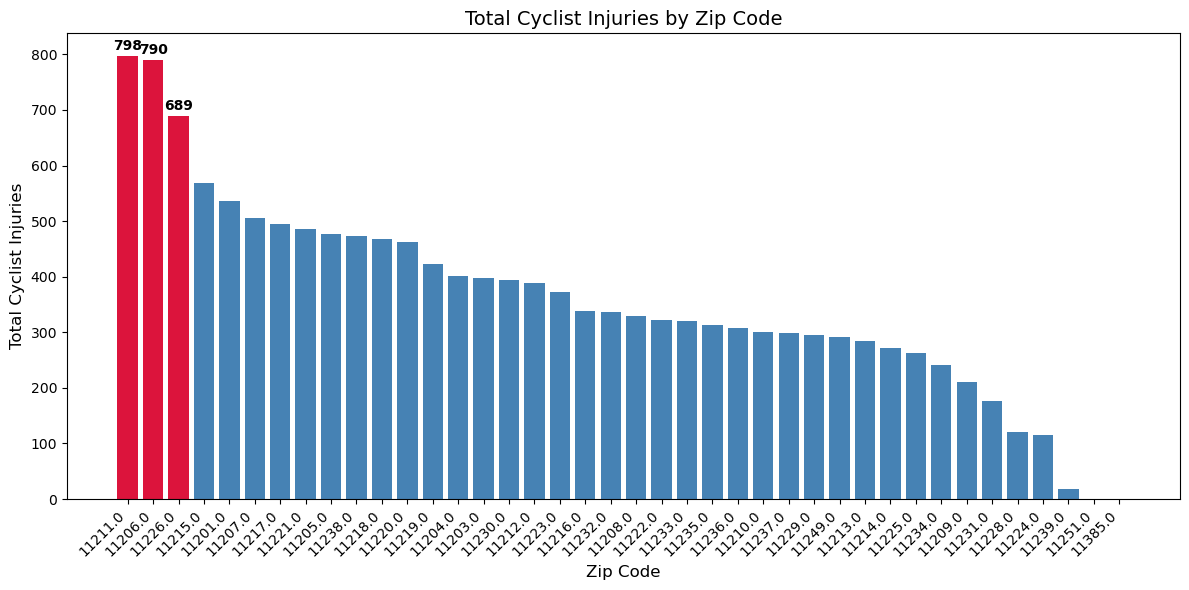

In [294]:
# Plot bar chart for cyclist injuries by zip code

# Number of top zip codes to highlight
top_n = 3

# Assign colors: red for top_n, blue for others
colors = ['crimson' if i < top_n else 'steelblue' for i in range(len(bike_totals))]

plt.figure(figsize=(12,6))
plt.bar(
    bike_totals['zip_code'].astype(str), 
    bike_totals['total_cyclist_injured'], 
    color=colors
)

plt.title('Total Cyclist Injuries by Zip Code', fontsize=14)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Total Cyclist Injuries', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate top 3 bars with counts
for i in range(top_n):
    plt.text(
        i, 
        bike_totals['total_cyclist_injured'].iloc[i] + 5, 
        bike_totals['total_cyclist_injured'].iloc[i], 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


In [207]:
bike_dec = bike_yearly_totals[bike_yearly_totals['zip_code'] == 11226.0]
bike_dec

,zip_code,year,total_cyclist_injured,bike_pct_change,bike_avg_pct
90,11211.0,2014,101,7.446809,-2.22802
91,11211.0,2015,97,-3.960396,-2.22802
92,11211.0,2016,87,-10.309278,-2.22802
93,11211.0,2017,90,3.448276,-2.22802
94,11211.0,2018,72,-20.000000,-2.22802
95,11211.0,2019,67,-6.944444,-2.22802
96,11211.0,2020,74,10.447761,-2.22802
97,11211.0,2021,69,-6.756757,-2.22802
98,11211.0,2022,69,0.000000,-2.22802
99,11211.0,2023,72,4.347826,-2.22802


In [209]:
#look at most dangerous streets in 11206
target_zip = 11226.0

# Ensure timestamp is datetime and extract year
brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
brooklyn['year'] = brooklyn['timestamp'].dt.year

# Filter for chosen zip code and remove incomplete years
zip_data = brooklyn[
    (brooklyn['zip_code'] == target_zip) & 
    (~brooklyn['year'].isin([2012, 2024]))
]

# Group by street and year, summing cyclist injuries
street_yearly = (
    zip_data.groupby(['on_street_name', 'year'], as_index=False)['number_of_cyclist_injured']
    .sum()
    .rename(columns={'number_of_cyclist_injured': 'total_bike_injuries'})
)

# Calculate percent change per street over years
street_yearly['pct_change'] = (
    street_yearly.groupby('on_street_name')['total_bike_injuries']
    .pct_change() * 100
)

# Drop NaN and inf
street_yearly = street_yearly.replace([np.inf, -np.inf], np.nan).dropna(subset=['pct_change'])

# --- Aggregates ---
street_summary = (
    street_yearly.groupby('on_street_name')
    .agg(
        avg_pct_change=('pct_change', 'mean'),
        total_bike_injuries=('total_bike_injuries', 'sum')
    )
    .reset_index()
)

street_summary = street_summary.sort_values(by='total_bike_injuries', ascending=False)

street_summary

/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/4034318274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/4034318274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['year'] = brooklyn['timestamp'].dt.year


,on_street_name,avg_pct_change,total_bike_injuries
54,OCEAN AVENUE,8.038767,62
5,BEDFORD AVENUE,-2.054716,50
11,CHURCH AVENUE,31.517857,31
7,BEVERLEY ROAD,60.238095,21
39,FLATBUSH AVENUE,-4.761905,21
...,...,...,...
64,SAINT PAULS COURT,-100.000000,0
66,SNYDER AVENUE,-100.000000,0
67,SNYDER AVENUE,-100.000000,0
69,VERONICA PLACE,-100.000000,0


In [210]:
street_yearly[street_yearly['on_street_name'].str.contains('OCEAN')]


,on_street_name,year,total_bike_injuries,pct_change
475,OCEAN AVENUE,2022,2,-50.000000
476,OCEAN AVENUE,2023,8,300.000000
478,OCEAN AVENUE,2014,7,133.333333
479,OCEAN AVENUE,2015,10,42.857143
480,OCEAN AVENUE,2016,13,30.000000
481,OCEAN AVENUE,2017,9,-30.769231
482,OCEAN AVENUE,2018,9,0.000000
483,OCEAN AVENUE,2019,8,-11.111111
484,OCEAN AVENUE,2020,4,-50.000000
485,OCEAN AVENUE,2021,2,-50.000000


In [186]:
brooklyn[brooklyn['number_of_cyclist_injured'] >= 1]['cross_street_name'].value_counts()

cross_street_name
4 AVENUE                            117
5 AVENUE                            101
BEDFORD AVENUE                       86
BEDFORD AVENUE                       78
5 AVENUE                             77
                                   ... 
DAHLGREN PLACE                        1
BAY 19 STREET                         1
MURDOCK COURT                         1
LORRAINE STREET                       1
COLEMAN STREET                        1
Name: count, Length: 1914, dtype: int64

In [229]:
#get heat map of bike injuries/accidents
# Group by location to find repeated hotspots
location_counts = (
    brooklyn.groupby(['latitude', 'longitude'], as_index=False)
    .agg(total_injuries=('number_of_cyclist_injured', 'sum'))
)

# Keep only hotspots with at least 5 total cyclist injuries
hotspots = location_counts[location_counts['total_injuries'] >= 2]

# Create map
m = folium.Map(location=[40.6782, -73.9442], zoom_start=12)

# Heatmap data
heat_data = list(zip(
    hotspots['latitude'],
    hotspots['longitude'],
    hotspots['total_injuries']
))

HeatMap(heat_data, radius=12, blur=8, max_zoom=15).add_to(m)

m.save("bike_injury_hotspots.html")
m



In [252]:
#compare 4th and 5th avenue
import pandas as pd
import numpy as np

# Ensure timestamp is datetime and extract year
brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
brooklyn['year'] = brooklyn['timestamp'].dt.year

# Filter only bike injuries with valid cross street
bike_data = brooklyn[
    (brooklyn['number_of_cyclist_injured'] >= 1) &
    (brooklyn['cross_street_name'].notna())
]

# Filter for 4th Avenue and 5th Avenue
ave_data = bike_data[bike_data['cross_street_name'].isin(['4 AVENUE', '5 AVENUE'])]

# Group by cross street and year
ave_yearly = (
    ave_data.groupby(['cross_street_name', 'year'], as_index=False)
    .agg(total_bike_injuries=('number_of_cyclist_injured', 'sum'))
)

# Calculate percent change per avenue
ave_yearly['pct_change'] = (
    ave_yearly.groupby('cross_street_name')['total_bike_injuries']
    .pct_change() * 100
)

# Remove NaN and inf values
ave_yearly = ave_yearly.replace([np.inf, -np.inf], np.nan)

# Optional: pivot table for easier comparison
comparison_table = ave_yearly.pivot(index='year', columns='cross_street_name', values=['total_bike_injuries','pct_change'])

comparison_table


/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/2882301414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/2882301414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['year'] = brooklyn['timestamp'].dt.year


total_bike_injuries           pct_change            
cross_street_name            4 AVENUE 5 AVENUE    4 AVENUE    5 AVENUE
year                                                                  
2014                              1.0      NaN         NaN         NaN
2016                              5.0      9.0  400.000000         NaN
2017                              5.0     17.0    0.000000   88.888889
2018                              9.0     12.0   80.000000  -29.411765
2019                             10.0     10.0   11.111111  -16.666667
2020                             17.0     21.0   70.000000  110.000000
2021                             18.0     14.0    5.882353  -33.333333
2022                             19.0     11.0    5.555556  -21.428571
2023                             29.0      9.0   52.631579  -18.181818
2024                              6.0      1.0  -79.310345  -88.888889

In [225]:
#get pedestrian injury map
# Group by coordinates and sum pedestrian injuries
ped_location_counts = (
    brooklyn.groupby(['latitude', 'longitude'], as_index=False)
    .agg(total_ped_injuries=('number_of_pedestrians_injured', 'sum'))
)

# Keep only hotspots with at least 5 pedestrian injuries
ped_hotspots = ped_location_counts[
    (ped_location_counts['total_ped_injuries'] >= 3) &
    (ped_location_counts['latitude'].notna()) &
    (ped_location_counts['longitude'].notna())
]

# Create map centered on Brooklyn
ped = folium.Map(location=[40.6782, -73.9442], zoom_start=12)

# Heatmap data
heat_data = list(zip(
    ped_hotspots['latitude'],
    ped_hotspots['longitude'],
    ped_hotspots['total_ped_injuries']
))

# Add heatmap
HeatMap(heat_data, radius=12, blur=8, max_zoom=15).add_to(ped)

# Save and display
ped.save("ped_injury_hotspots.html")
ped


In [221]:
#get all persons injury map
location_counts = (
    brooklyn.groupby(['latitude', 'longitude'], as_index=False)
    .agg(total_injuries=('number_of_persons_injured', 'sum'))
)

# Keep only hotspots with at least 5 total injuries
hotspots = location_counts[location_counts['total_injuries'] >= 10]

# Create base map centered on Brooklyn (approx coordinates)
p = folium.Map(location=[40.6782, -73.9442], zoom_start=12)

# Prepare heatmap data: [lat, lon, weight] (weight = number injured)
heat_data = list(zip(
    hotspots['latitude'],
    hotspots['longitude'],
    hotspots['total_injuries']
))

# Add heatmap layer
HeatMap(heat_data, radius=8, blur=6, max_zoom=15).add_to(p)

# Save map to HTML
p.save("persons_injuries_heatmap.html")

p

In [335]:
# get motorist injuries map
# Group by coordinates and sum motorist injuries
motorist_location_counts = (
    brooklyn.groupby(['latitude', 'longitude'], as_index=False)
    .agg(total_motorist_injuries=('number_of_motorist_injured', 'sum'))
)

# Keep only hotspots with at least 20 motorist injuries
motorist_hotspots = motorist_location_counts[
    (motorist_location_counts['total_motorist_injuries'] >= 20) &
    (motorist_location_counts['latitude'].notna()) &
    (motorist_location_counts['longitude'].notna())
]

# Create map centered on Brooklyn
moto = folium.Map(location=[40.6782, -73.9442], zoom_start=12)

# Heatmap data
heat_data = list(zip(
    motorist_hotspots['latitude'],
    motorist_hotspots['longitude'],
    motorist_hotspots['total_motorist_injuries']
))

# Add heatmap
HeatMap(heat_data, radius=12, blur=8, max_zoom=15).add_to(moto)

# Save and display
moto.save("motorist_injury_hotspots.html")
moto


In [171]:

# Copy DataFrame
year_dif = brooklyn.copy()

# Remove blank or null zip codes
year_dif = year_dif[year_dif['zip_code'].notna() & (year_dif['zip_code'].astype(str).str.strip() != '')]

# Ensure timestamp is datetime and extract year
year_dif['timestamp'] = pd.to_datetime(year_dif['timestamp'], errors='coerce')
year_dif['year'] = year_dif['timestamp'].dt.year

# Remove invalid years and exclude incomplete years 2012 & 2024
year_dif = year_dif[year_dif['year'].notna() & (~year_dif['year'].isin([2012, 2024]))]

# Group by zip code and year, summing number_of_pedestrians_injured
ped_yearly_totals = year_dif.groupby(['zip_code', 'year'], as_index=False) \
                            .agg({'number_of_pedestrians_injured': 'sum'}) \
                            .rename(columns={'number_of_pedestrians_injured': 'total_pedestrians_injured'})

# Calculate percent change per zip code
ped_yearly_totals['ped_pct_change'] = ped_yearly_totals.groupby('zip_code')['total_pedestrians_injured'] \
                                                       .pct_change() * 100

# Replace inf/-inf with NaN
ped_yearly_totals['ped_pct_change'] = ped_yearly_totals['ped_pct_change'].replace([np.inf, -np.inf], np.nan)

# --- Drop only the first year per zip code ---
ped_yearly_totals = ped_yearly_totals.groupby('zip_code', group_keys=False) \
                                     .apply(lambda g: g.sort_values('year').iloc[1:])

# Drop any remaining NaN in ped_pct_change
ped_yearly_totals = ped_yearly_totals.dropna(subset=['ped_pct_change'])

# Calculate average percent change per zip code and rename column to ped_avg_pct
ped_avg_pct = ped_yearly_totals.groupby('zip_code')['ped_pct_change'].mean().reset_index()
ped_avg_pct = ped_avg_pct.rename(columns={'ped_pct_change': 'ped_avg_pct'})

# Merge back into ped_yearly_totals
ped_yearly_totals = ped_yearly_totals.merge(ped_avg_pct, on='zip_code', how='left')

# Sort for readability
ped_yearly_totals = ped_yearly_totals.sort_values(['zip_code', 'year']).reset_index(drop=True)

ped_yearly_totals

/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/4008574964.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values('year').iloc[1:])


,zip_code,year,total_pedestrians_injured,ped_pct_change,ped_avg_pct
0,11201.0,2014,123,7.894737,-1.532124
1,11201.0,2015,81,-34.146341,-1.532124
2,11201.0,2016,95,17.283951,-1.532124
3,11201.0,2017,60,-36.842105,-1.532124
4,11201.0,2018,89,48.333333,-1.532124
...,...,...,...,...,...
377,11249.0,2021,30,50.000000,11.145332
378,11249.0,2022,26,-13.333333,11.145332
379,11249.0,2023,31,19.230769,11.145332
380,11385.0,2015,0,-100.000000,-100.000000


In [172]:
#get total injured and avg pcnt change per zip cod4

    # get total number of bike injuries per zip code
ped_total_incidents = ped_yearly_totals.groupby('zip_code')['total_pedestrians_injured'].sum().reset_index()

    # average number pct change per zip code
ped_total_average = ped_yearly_totals.groupby('zip_code')['ped_pct_change'].mean().reset_index()

    # merge tables
ped_totals = ped_total_incidents.merge(ped_total_average, on='zip_code', how='left')

    #sort by descending
ped_totals = ped_totals.sort_values(by='total_pedestrians_injured', ascending=False)

ped_totals.rename(columns={'ped_pct_change': 'ped_avg_pct'}, inplace=True)
ped_totals

,zip_code,total_pedestrians_injured,ped_avg_pct
10,11212.0,1259,-1.416525
5,11207.0,1250,1.625580
24,11226.0,1244,-4.475505
33,11236.0,1023,-0.338076
1,11203.0,987,-3.388287
18,11220.0,954,0.378623
6,11208.0,949,0.832592
27,11230.0,902,-0.158255
17,11219.0,883,-4.650251
4,11206.0,872,-3.536888


In [173]:
danger1 = brooklyn[brooklyn['zip_code'] == 11207.0]
danger1['cross_street_name'].value_counts()

cross_street_name
PENNSYLVANIA AVENUE                 843
PENNSYLVANIA AVENUE                 822
LINDEN BOULEVARD                    441
GEORGIA AVENUE                      436
ATLANTIC AVENUE                     399
                                   ... 
SCHENCK COURT                         1
Covert Street                         1
barbey street                         1
Van sinderen avenue                   1
ATLANTIC AVE                          1
Name: count, Length: 259, dtype: int64

In [297]:
brooklyn[brooklyn['number_of_cyclist_injured'] >=1]['contributing_factor_vehicle_1'].value_counts()

contributing_factor_vehicle_1
Unspecified                                              5774
Driver Inattention/Distraction                           3725
Failure to Yield Right-of-Way                            2027
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     891
Traffic Control Disregarded                               635
Passenger Distraction                                     504
Passing or Lane Usage Improper                            361
Other Vehicular                                           260
Following Too Closely                                     247
View Obstructed/Limited                                   233
Turning Improperly                                        221
Unsafe Speed                                              186
Passing Too Closely                                       171
Physical Disability                                       161
Driver Inexperience                                       152
Alcohol Involvement                     

In [177]:
danger2 = brooklyn[brooklyn['zip_code'] == 11226.0]
danger2['cross_street_name'].value_counts()

cross_street_name
CHURCH AVENUE                       384
CHURCH AVENUE                       380
OCEAN AVENUE                        339
BEDFORD AVENUE                      336
FLATBUSH AVENUE                     334
                                   ... 
st. pauls court                       1
FLATBUSH AVENUE                       1
BEVERLEY RD                           1
SNYDER AVE                            1
bedford ave                           1
Name: count, Length: 154, dtype: int64

In [178]:
danger2['time_of_day'].value_counts()

time_of_day
afternoon rush hour (3 - 6 pm)    4572
lunch rush (11 am - 2 pm)         3773
morning (7-10 am)                 3142
evening (7 - 10 pm)               2959
night (11 - 4 am)                 1888
sunrise (5 am - 7 am)              586
Name: count, dtype: int64

In [179]:
danger3 = brooklyn[brooklyn['zip_code'] == 11212.0]
danger3['cross_street_name'].value_counts()

cross_street_name
LINDEN BOULEVARD                    359
ROCKAWAY AVENUE                     318
ROCKAWAY PARKWAY                    282
LINDEN BOULEVARD                    275
ROCKAWAY AVENUE                     267
                                   ... 
Linden blvd                           1
Thomas S Boyland street               1
Hegeman Ave                           1
Osborn                                1
Riverdale                             1
Name: count, Length: 219, dtype: int64

In [180]:
danger3['time_of_day'].value_counts()

time_of_day
afternoon rush hour (3 - 6 pm)    4655
lunch rush (11 am - 2 pm)         3621
morning (7-10 am)                 3253
evening (7 - 10 pm)               2940
night (11 - 4 am)                 2098
sunrise (5 am - 7 am)              620
Name: count, dtype: int64

In [250]:
brooklyn[brooklyn['zip_code']==11201]['cross_street_name'].unique()

array(['FULTON STREET', nan, 'BROOKLYN BRIDGE', 'BALTIC STREET',
       'WYCKOFF STREET                  ', 'KANE STREET',
       'HENRY STREET                    ', 'HOYT STREET', 'COURT STREET',
       'FULTON STREET                   ',
       'FLATBUSH AVENUE EXTENSION       ',
       'HOYT STREET                     ', 'CONGRESS STREET',
       'COURT STREET                    ', 'STATE STREET',
       'SCHERMERHORN STREET             ',
       'DEKALB AVENUE                   ',
       'CLINTON STREET                  ',
       'LIVINGSTON STREET               ', 'HICKS STREET', 'FLEET STREET',
       'FLEET STREET                    ',
       'ADAMS STREET                    ', 'CLINTON STREET',
       'NAVY STREET                     ', 'NAVY STREET', 'HUDSON WALK',
       'MYRTLE AVENUE                   ', 'MYRTLE AVENUE',
       'BRIDGE STREET', 'MONTAGUE STREET', 'PIERREPONT STREET',
       'HENRY STREET', 'PRINCE STREET',
       'JOHNSON STREET                  ', 'JOHNSON

In [287]:
# look at highest number of injury vehicle reasons per year 
pd.set_option('display.max_rows', 70)
# Ensure timestamp is datetime and extract year
brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
brooklyn['year'] = brooklyn['timestamp'].dt.year

# Filter bike injuries with valid contributing factor
bike_data = brooklyn[
    (brooklyn['number_of_persons_injured'] >= 1) &
    (brooklyn['contributing_factor_vehicle_1'].notna()) &
    (~brooklyn['year'].isin([2012, 2024]))
]

# Group by year and contributing factor
factor_counts = (
    bike_data.groupby(['year', 'contributing_factor_vehicle_1'])
    .size()
    .reset_index(name='count')
)

# Pivot table: rows = years, columns = factors
factor_pivot = factor_counts.pivot(
    index='year',
    columns='contributing_factor_vehicle_1',
    values='count'
).fillna(0)

# Add totals column
factor_pivot['Total'] = factor_pivot.sum(axis=1)

factor_transformed = factor_counts.pivot(
    index='contributing_factor_vehicle_1',
    columns='year',
    values='count'
).fillna(0)

# Add totals column (sum across years)
factor_transformed['Total'] = factor_transformed.sum(axis=1)

# Sort by total (optional, highest at top)
factor_transformed = factor_transformed.sort_values('Total', ascending=False)

factor_transformed


/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/2793463683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['timestamp'] = pd.to_datetime(brooklyn['timestamp'], errors='coerce')
/var/folders/l0/c3_hg4_n7137mz2lzbtvw1xm0000gn/T/ipykernel_1757/2793463683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn['year'] = brooklyn['timestamp'].dt.year


year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
contributing_factor_vehicle_1,,,,,,,,,,,,
Unspecified,7386.0,5971.0,4894.0,2810.0,2233.0,2557.0,2457.0,1944.0,2487.0,2419.0,2558.0,37716.0
Driver Inattention/Distraction,855.0,1003.0,1240.0,1903.0,1980.0,2358.0,2562.0,1894.0,2099.0,2392.0,2614.0,20900.0
Failure to Yield Right-of-Way,745.0,900.0,1046.0,1299.0,1269.0,1337.0,1311.0,930.0,1062.0,1093.0,1024.0,12016.0
Traffic Control Disregarded,187.0,233.0,238.0,415.0,422.0,379.0,339.0,314.0,433.0,387.0,459.0,3806.0
Following Too Closely,17.0,19.0,26.0,522.0,524.0,600.0,564.0,314.0,325.0,314.0,326.0,3551.0
Unsafe Speed,12.0,12.0,9.0,232.0,218.0,182.0,204.0,222.0,292.0,290.0,301.0,1974.0
Other Vehicular,126.0,126.0,198.0,162.0,181.0,176.0,212.0,179.0,188.0,164.0,236.0,1948.0
Backing Unsafely,123.0,159.0,150.0,198.0,196.0,264.0,223.0,137.0,167.0,143.0,151.0,1911.0
Passing or Lane Usage Improper,3.0,9.0,6.0,178.0,183.0,211.0,215.0,171.0,236.0,226.0,255.0,1693.0


In [306]:
#see change in cyclists injured for 9th ave in manhattan over time
collisions['timestamp'] = pd.to_datetime(collisions['timestamp'], errors='coerce')
collisions['year'] = collisions['timestamp'].dt.year

# Regex pattern for all 9th Avenue variants
pattern_9th = r'^\s*9(th)?\s*AVE(NUE)?\s*$'

# Filter for bike injuries on 9th Avenue variants in Manhattan
bike_9th_manhattan = collisions[
    (collisions['number_of_cyclist_injured'] >= 1) &
    (collisions['on_street_name'].str.upper().str.contains('9')) &  # quick prefilter
    (collisions['on_street_name'].str.upper().str.match(pattern_9th)) &
    (collisions['borough'].str.upper() == 'MANHATTAN') &
    (~collisions['year'].isin([2012, 2024]))
]

# Group by year
bike_9th_yearly = (
    bike_9th_manhattan.groupby('year')['number_of_cyclist_injured']
    .sum()
    .reset_index(name='total_cyclist_injuries')
)

# Calculate percent change (year-over-year)
bike_9th_yearly['pct_change'] = bike_9th_yearly['total_cyclist_injuries'].pct_change() * 100

# Subset only decreases
bike_9th_decreases = bike_9th_yearly[bike_9th_yearly['pct_change'] < 0]

bike_9th_yearly, bike_9th_decreases


(    year  total_cyclist_injuries  pct_change
 0   2013                      14         NaN
 1   2014                       6  -57.142857
 2   2015                      11   83.333333
 3   2016                      10   -9.090909
 4   2017                       4  -60.000000
 5   2018                       5   25.000000
 6   2019                       6   20.000000
 7   2020                       5  -16.666667
 8   2021                       5    0.000000
 9   2022                       3  -40.000000
 10  2023                       4   33.333333,
    year  total_cyclist_injuries  pct_change
 1  2014                       6  -57.142857
 3  2016                      10   -9.090909
 4  2017                       4  -60.000000
 7  2020                       5  -16.666667
 9  2022                       3  -40.000000)

In [322]:
collisions[collisions['zip_code']==10003]['on_street_name'].unique()

array(['BOWERY                          ',
       'EAST 2 STREET                   ', nan,
       'EAST 3 STREET                   ',
       'EAST 4 STREET                   ',
       '2 AVENUE                        ',
       '3 AVENUE                        ',
       'BROADWAY                        ',
       'LAFAYETTE STREET                ',
       'ASTOR PLACE                     ',
       'WAVERLY PLACE                   ', 'EAST 10 STREET',
       'EAST 9 STREET                   ',
       'EAST 10 STREET                  ',
       '4 AVENUE                        ',
       'EAST 8 STREET                   ',
       'EAST 12 STREET                  ',
       'EAST 11 STREET                  ',
       'EAST 13 STREET                  ', 'EAST 12 STREET',
       'EAST 15 STREET                  ',
       '5 AVENUE                        ',
       'EAST 17 STREET                  ',
       'EAST 14 STREET                  ',
       'UNION SQUARE WEST               ',
       'EAST 

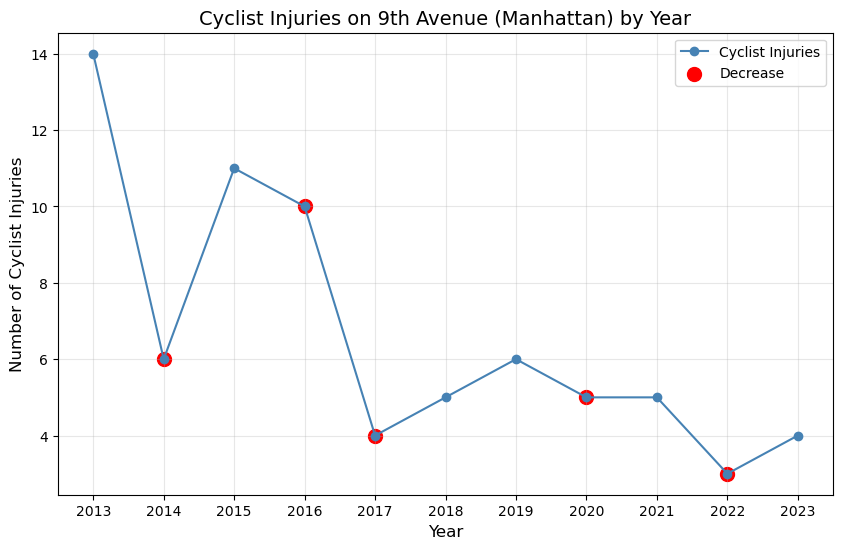

In [307]:
# get chart that shows change in cyclist injuries over time on 9th ave
# Remove incomplete years 2012 and 2024
bike_9th_yearly_filtered = bike_9th_yearly[
    ~bike_9th_yearly['year'].isin([2012, 2024])
]

plt.figure(figsize=(10,6))

# Line chart
plt.plot(
    bike_9th_yearly_filtered['year'], 
    bike_9th_yearly_filtered['total_cyclist_injuries'], 
    marker='o', linestyle='-', color='steelblue', label='Cyclist Injuries'
)

# Highlight decreases in red
decreases = bike_9th_yearly_filtered[bike_9th_yearly_filtered['pct_change'] < 0]
plt.scatter(
    decreases['year'], 
    decreases['total_cyclist_injuries'], 
    color='red', s=100, label='Decrease'
)

# Labels
plt.title("Cyclist Injuries on 9th Avenue (Manhattan) by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cyclist Injuries", fontsize=12)
plt.xticks(bike_9th_yearly_filtered['year'])
plt.legend()
plt.grid(alpha=0.3)

plt.show()


In [323]:
collisions[collisions['zip_code']==10003]['on_street_name'].unique()

array(['BOWERY                          ',
       'EAST 2 STREET                   ', nan,
       'EAST 3 STREET                   ',
       'EAST 4 STREET                   ',
       '2 AVENUE                        ',
       '3 AVENUE                        ',
       'BROADWAY                        ',
       'LAFAYETTE STREET                ',
       'ASTOR PLACE                     ',
       'WAVERLY PLACE                   ', 'EAST 10 STREET',
       'EAST 9 STREET                   ',
       'EAST 10 STREET                  ',
       '4 AVENUE                        ',
       'EAST 8 STREET                   ',
       'EAST 12 STREET                  ',
       'EAST 11 STREET                  ',
       'EAST 13 STREET                  ', 'EAST 12 STREET',
       'EAST 15 STREET                  ',
       '5 AVENUE                        ',
       'EAST 17 STREET                  ',
       'EAST 14 STREET                  ',
       'UNION SQUARE WEST               ',
       'EAST 

In [327]:
# get number of persons injured on 3rd ave over time
# Normalize street names to uppercase
collisions['on_street_name_upper'] = collisions['on_street_name'].str.upper()

# Define street name variations
third_ave_variants = ['3RD AVENUE', '3RD AVE', '3 AVENUE', '3 AVE', '3 AVENUE','3 AVENUE                        ','3 avenue                        ']

# Filter for zip code 10003 and relevant streets with injuries
third_ave_df = collisions[
    (collisions['zip_code'] == 10003) &
    (collisions['on_street_name_upper'].isin(third_ave_variants)) &
    (collisions['number_of_persons_injured'] > 0)
]

# Group by year and sum injuries
third_ave_yearly = third_ave_df.groupby('year')['number_of_persons_injured'].sum().reset_index()

# Optional: remove incomplete years
third_ave_yearly = third_ave_yearly[~third_ave_yearly['year'].isin([2012, 2024])]

# Calculate percent change year-over-year
third_ave_yearly['pct_change'] = third_ave_yearly['number_of_persons_injured'].pct_change() * 100

# Display the table
third_ave_yearly


,year,number_of_persons_injured,pct_change
1,2013,23,NaN
2,2014,31,34.782609
3,2015,21,-32.258065
4,2016,15,-28.571429
5,2017,7,-53.333333
6,2018,18,157.142857
7,2019,8,-55.555556
8,2020,10,25.000000
9,2021,13,30.000000
10,2022,6,-53.846154


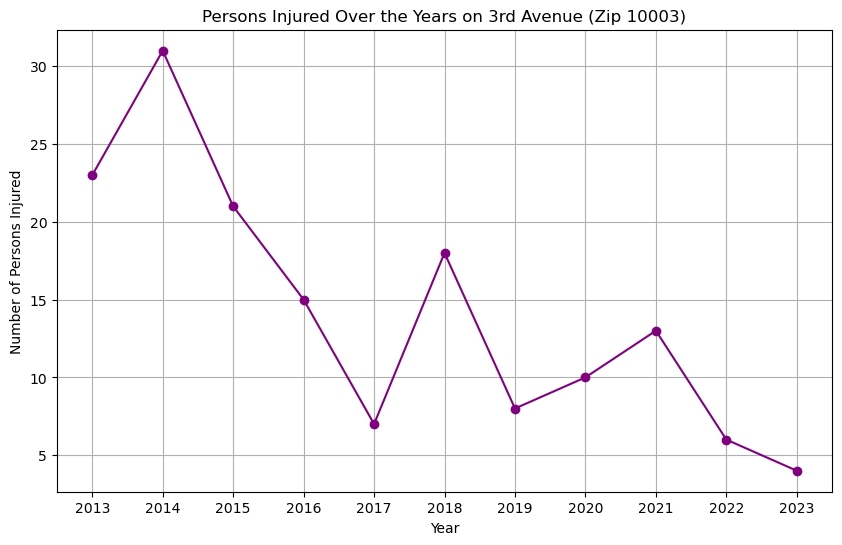

In [328]:
#show chart of persons injured over time on 3rd ave
# Plot a line chart
plt.figure(figsize=(10,6))
plt.plot(third_ave_yearly['year'], third_ave_yearly['number_of_persons_injured'], marker='o', color='purple')
plt.title("Persons Injured Over the Years on 3rd Avenue (Zip 10003)")
plt.xlabel("Year")
plt.ylabel("Number of Persons Injured")
plt.grid(True)
plt.xticks(third_ave_yearly['year'])  # Show all years on x-axis
plt.show()



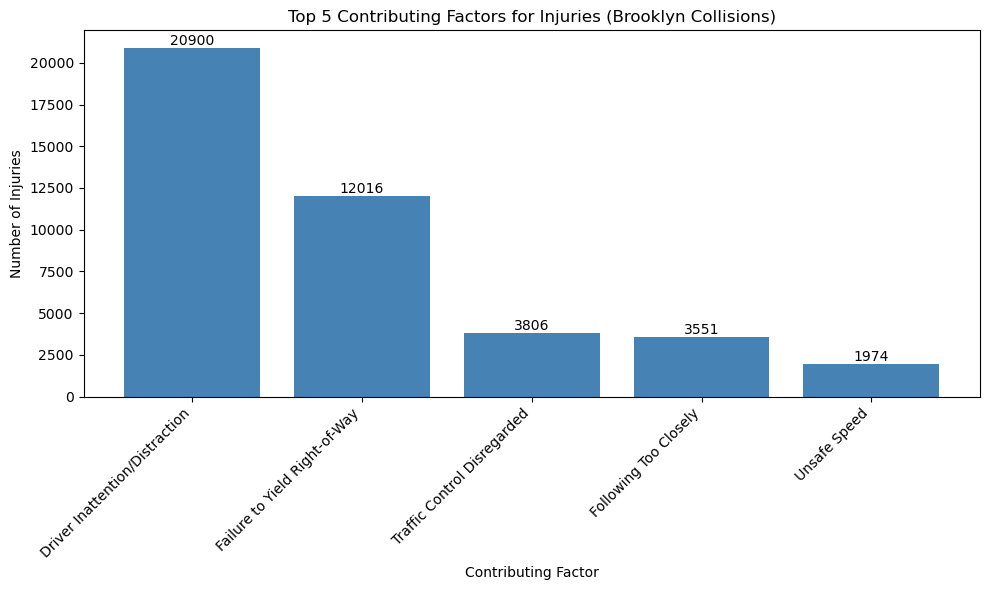

In [333]:
# bar chart to show largest factros for accidents in brooklyn
# Use factor_transformed which already has totals
factor_totals = factor_transformed['Total'].reset_index()

# Remove 'Unspecified' (any case variations)
factor_totals = factor_totals[~factor_totals['contributing_factor_vehicle_1'].str.upper().eq("UNSPECIFIED")]

# Get top 5 factors
top5 = factor_totals.sort_values('Total', ascending=False).head(5)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top5['contributing_factor_vehicle_1'], top5['Total'], color='steelblue')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Contributing Factor")
plt.ylabel("Number of Injuries")
plt.title("Top 5 Contributing Factors for Injuries (Brooklyn Collisions)")
plt.tight_layout()
plt.show()



In [339]:
#manhattan injuries heatmap to analyze columbus circle
# Group by coordinates and sum total persons injured
injury_location_counts = (
    collisions.groupby(['latitude', 'longitude'], as_index=False)
    .agg(total_injuries=('number_of_persons_injured', 'sum'))
)

# Keep only hotspots with at least 20 injuries
injury_hotspots = injury_location_counts[
    (injury_location_counts['total_injuries'] >= 20) &
    (injury_location_counts['latitude'].notna()) &
    (injury_location_counts['longitude'].notna())
]

# Create base map centered on NYC with more flexible zoom
nyc = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=11,
    min_zoom=5,    # allows zooming farther out
    max_zoom=18,   # allows zooming closer in
    control_scale=True,  # adds scale bar
    zoom_control=True     # keeps zoom buttons
)

# Prepare heatmap data
heat_data = list(zip(
    injury_hotspots['latitude'],
    injury_hotspots['longitude'],
    injury_hotspots['total_injuries']
))

# Add heatmap
HeatMap(heat_data, radius=12, blur=8, max_zoom=18).add_to(nyc)

# Save and display
nyc.save("injury_hotspots.html")
nyc
